In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df= pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


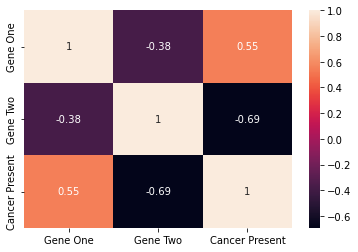

In [2]:
sns.heatmap(df.corr(),annot= True);

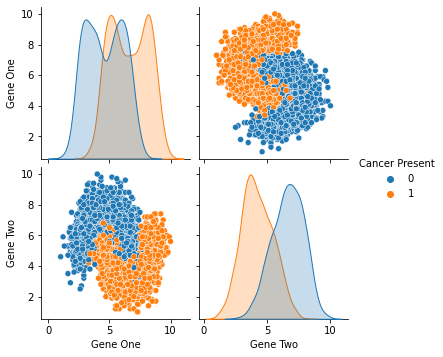

In [3]:
sns.pairplot(data = df, hue = 'Cancer Present');

In [5]:
X =df.drop('Cancer Present',axis=1)
y=df['Cancer Present']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn_model =  KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)
y_test_pred = knn_model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[316,  38],
       [ 33, 363]], dtype=int64)

In [10]:
len(y_test)

750

In [11]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       354
           1       0.91      0.92      0.91       396

    accuracy                           0.91       750
   macro avg       0.91      0.90      0.90       750
weighted avg       0.91      0.91      0.91       750



In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
test_error_rates=[]
for i in range (1,30):
    knn_model =  KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,y_train)
    y_test_pred = knn_model.predict(X_test)
    test_error= 1-accuracy_score(y_test, y_test_pred)
    test_error_rates.append(test_error)

In [14]:
test_error_rates

[0.09466666666666668,
 0.09333333333333338,
 0.07333333333333336,
 0.07199999999999995,
 0.07066666666666666,
 0.06666666666666665,
 0.06533333333333335,
 0.06533333333333335,
 0.07333333333333336,
 0.06799999999999995,
 0.07066666666666666,
 0.07199999999999995,
 0.07199999999999995,
 0.07333333333333336,
 0.06666666666666665,
 0.06799999999999995,
 0.06933333333333336,
 0.07066666666666666,
 0.06799999999999995,
 0.06799999999999995,
 0.06666666666666665,
 0.06933333333333336,
 0.06799999999999995,
 0.06533333333333335,
 0.06399999999999995,
 0.06799999999999995,
 0.06666666666666665,
 0.06399999999999995,
 0.06266666666666665]

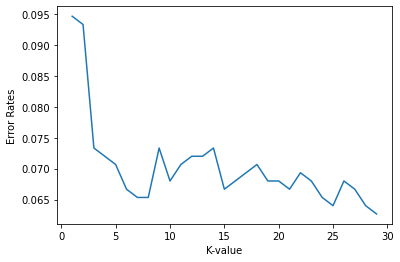

In [16]:
plt.plot(range(1,30),test_error_rates);
plt.ylabel('Error Rates');
plt.xlabel('K-value');

In [18]:
#Pipeline > GridSearch using Cross Validation
scaler = StandardScaler()
knn =  KNeighborsClassifier(n_neighbors=i)
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [19]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [23]:
operations = [('scaler',scaler),('knn',knn),]

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline(operations)

In [26]:
k_values = list(range(1,20))
param_grid = {'knn__n_neighbors':k_values}

In [27]:
full_cv_classifier = GridSearchCV (pipe,param_grid,cv=10,scoring='accuracy' )
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=29))]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [28]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [29]:
y_pred= full_cv_classifier.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       354
           1       0.94      0.95      0.94       396

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750

